Este Dataset Trabalha os dados de uma companhia de seguros para automóveis.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
print(tf.__version__)

2.12.0


In [3]:
from sklearn.preprocessing import FunctionTransformer , StandardScaler

# **MACHINE LEARNING MODELS**

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [4]:
from sklearn.metrics import classification_report

# Importação do Dataset

In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ia-tp2/sample_submission.csv/sample_submission.csv
/kaggle/input/ia-tp2/train.csv/train.csv
/kaggle/input/ia-tp2/test.csv/test.csv


In [6]:
import os

In [7]:
os.listdir('/kaggle/input/')

['ia-tp2']

In [8]:
data = pd.read_csv("/kaggle/input/ia-tp2/train.csv/train.csv")

In [9]:
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [11]:
data.drop(["id"] , axis = 1 , inplace = True)

In [12]:
data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


<Axes: ylabel='Gender'>

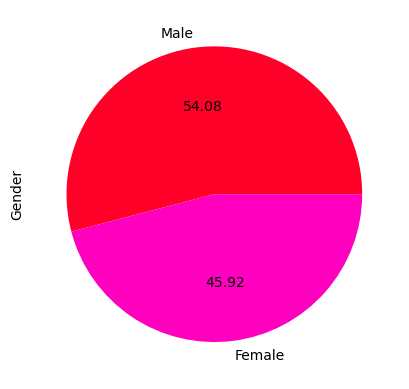

In [13]:
data["Gender"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

In [14]:
data["Gender"] = np.where(data["Gender"] == "Male" , 1 , 0)

In [15]:
data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,1,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,1,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,0,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,1,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,1,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,0,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


<Axes: xlabel='Age', ylabel='Density'>

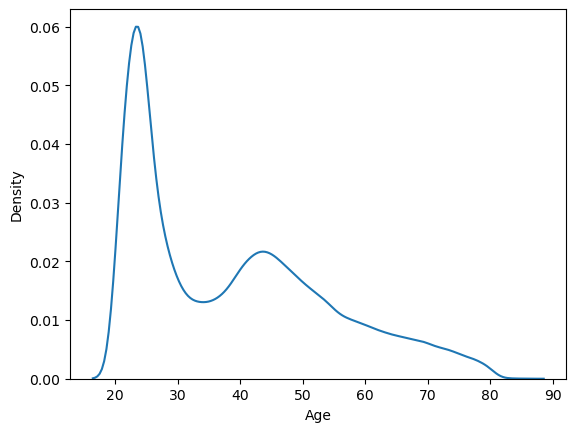

In [16]:
import seaborn as sns

sns.kdeplot(data["Age"])

In [17]:

! pip install numpy

import numpy as np 

def log(value):

    return np.log1p(value)

def square(value):

    return np.sqaure(value)

def yeo_johnson(value , lambdas):

    if value >= 0:

        if lambdas == 0:

            return (np.log1p(value))

        else:

            return ((((value + 1) ** lambdas) - 1) / lambdas)

    if value < 0:

        if lambdas == 2: 

            return (-np.log1p(-value))

        else : 

            return ((- ((((- value) + 1) ** 2 - lambdas) - 1)) / (2 - lambdas))

def box_cox(value , lambdas):

    if lambdas == 0:

        return np.log1p(value)

    else :

        return ((((value + 1) ** lambdas) - 1) / lambdas)

def function_transformer(array , func = None):

    if func == None:
        print("Please enter a function")
        return None

    elif func == "log" or func == "square":

        output_array = np.empty(shape = array.shape)

        if len(array.shape) == 1:
            new_array = np.empty(shape = (1 , 1))
            for i in array:

                if func == "log":

                    new_array = np.vstack([new_array , log_output(i)])

                else:

                    new_array = np.vstack([new_array , square(i)])

            new_array = np.delete(new_array , 0 , 0)

            return new_array

        else :

            for i in array:

                new_array = np.empty(shape = (1 , 1))

                for j in array[i]:

                    if func == "log":

                        new_array = np.vstack([new_array , log_output(i)])
                    else:

                        new_array = np.vstack([new_array , square(i)])

                new_array = np.delete(new_array , 0 , 0)

                output_array = np.hstack([output_array , new_array])
                output_array = np.delete(output_array , 0 , 1)

            return output_array

    elif func == "box_cox" or func == "yeo_johnson":

        output_array = np.empty(shape = array.shape)

        if len(array.shape) == 1:

            array_list = []
            skew_list = []

            for constant in range(-5 , 5):

                new_array = np.empty(shape = (1 , 1))

                for values in array:

                    if func == "box_cox":

                        new_array = np.vstack([new_array , box_cox(values , constant)])

                    else :
                        new_array = np.vstack([new_array , yeo_johnson(values , constant)])

                new_array = np.delete(new_array , 0 , 0)

                array_list.append(new_array)
                skew_list.append(pd.DataFrame(new_array).skew()[0] ** 2)

                output_array = array_list[np.argmin(skew_list)]

            return output_array

        elif len(array.shape) != 1:

            for columns in array:

                array_list = []
                skew_list = []

                for constant in range(-5 , 5):

                    new_array = np.empty(shape = (1 , 1))

                    for values in array[columns]:

                        if func == "box_cox":

                            new_array = np.vstack([new_array , box_cox(values , constant)])

                        else :

                            new_array = np.vstack([new_array , yeo_johnson(values , constant)])

                    new_array = np.delete(new_array , 0 , 0)

                    array_list.append(new_array)
                    skew_list.append(pd.DataFrame(new_array).skew()[0] ** 2)

                    output = array_list[np.argmin(skew_list)]

                output_array = np.hstack([output_array , output])

                output_array = np.delete(output_array , 0 , 1)

            return output_array

        else :
            print("Please enter a valid input")

    else :
        print("Please enter a valid function")
        return None

<Axes: xlabel='Age', ylabel='Density'>

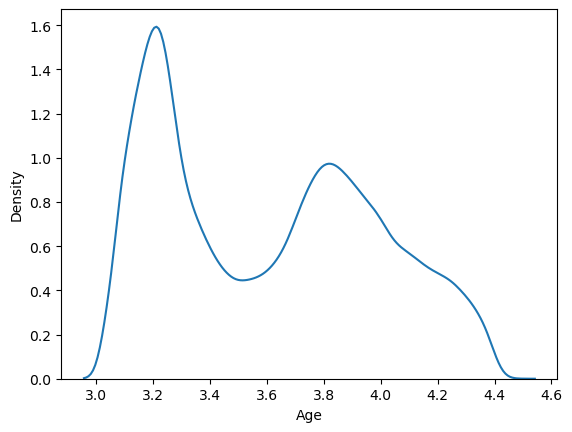

In [18]:
sns.kdeplot(FunctionTransformer(func = np.log1p).fit_transform(data["Age"]))

In [19]:
data = pd.concat([FunctionTransformer(func = np.log1p).fit_transform(data["Age"]) , 
                 data.drop("Age" , axis = 1)] , 
                axis = 1 , join = "inner")

In [20]:
data

,Age,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,3.806662,1,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,4.343805,1,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3.871201,1,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,3.091042,1,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,3.401197,0,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,4.317488,1,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,3.433987,1,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,3.091042,1,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,4.234107,0,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [21]:
! pip install numpy

import numpy as np 

def log(value):

    return np.log1p(value)

def square(value):

    return np.sqaure(value)

def yeo_johnson(value , lambdas):

    if value >= 0:

        if lambdas == 0:

            return (np.log1p(value))

        else:

            return ((((value + 1) ** lambdas) - 1) / lambdas)

    if value < 0:

        if lambdas == 2: 

            return (-np.log1p(-value))

        else : 

            return ((- ((((- value) + 1) ** 2 - lambdas) - 1)) / (2 - lambdas))

def box_cox(value , lambdas):

    if lambdas == 0:

        return np.log1p(value)

    else :

        return ((((value + 1) ** lambdas) - 1) / lambdas)

def function_transformer(array , func = None):

    if func == None:
        print("Please enter a function")
        return None

    elif func == "log" or func == "square":

        output_array = np.empty(shape = array.shape)

        if len(array.shape) == 1:
            new_array = np.empty(shape = (1 , 1))
            for i in array:

                if func == "log":

                    new_array = np.vstack([new_array , log_output(i)])

                else:

                    new_array = np.vstack([new_array , square(i)])

            new_array = np.delete(new_array , 0 , 0)

            return new_array

        else :

            for i in array:

                new_array = np.empty(shape = (1 , 1))

                for j in array[i]:

                    if func == "log":

                        new_array = np.vstack([new_array , log_output(i)])
                    else:

                        new_array = np.vstack([new_array , square(i)])

                new_array = np.delete(new_array , 0 , 0)

                output_array = np.hstack([output_array , new_array])
                output_array = np.delete(output_array , 0 , 1)

            return output_array

    elif func == "box_cox" or func == "yeo_johnson":

        output_array = np.empty(shape = array.shape)

        if len(array.shape) == 1:

            array_list = []
            skew_list = []

            for constant in range(-5 , 5):

                new_array = np.empty(shape = (1 , 1))

                for values in array:

                    if func == "box_cox":

                        new_array = np.vstack([new_array , box_cox(values , constant)])

                    else :
                        new_array = np.vstack([new_array , yeo_johnson(values , constant)])

                new_array = np.delete(new_array , 0 , 0)

                array_list.append(new_array)
                skew_list.append(pd.DataFrame(new_array).skew()[0] ** 2)

                output_array = array_list[np.argmin(skew_list)]

            return output_array

        elif len(array.shape) != 1:

            for columns in array:

                array_list = []
                skew_list = []

                for constant in range(-5 , 5):

                    new_array = np.empty(shape = (1 , 1))

                    for values in array[columns]:

                        if func == "box_cox":

                            new_array = np.vstack([new_array , box_cox(values , constant)])

                        else :

                            new_array = np.vstack([new_array , yeo_johnson(values , constant)])

                    new_array = np.delete(new_array , 0 , 0)

                    array_list.append(new_array)
                    skew_list.append(pd.DataFrame(new_array).skew()[0] ** 2)

                    output = array_list[np.argmin(skew_list)]

                output_array = np.hstack([output_array , output])

                output_array = np.delete(output_array , 0 , 1)

            return output_array

        else :
            print("Please enter a valid input")

    else :
        print("Please enter a valid function")
        return None

In [22]:
data = pd.concat([FunctionTransformer(func = np.log1p).fit_transform(data["Age"]) , 
                 data.drop("Age" , axis = 1)] , 
                axis = 1 , join = "inner")

In [23]:
data

,Age,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1.570003,1,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,1.675938,1,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,1.583341,1,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,1.408800,1,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,1.481877,0,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,1.671001,1,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,1.489299,1,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,1.408800,1,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,1.655196,0,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


<Axes: ylabel='Driving_License'>

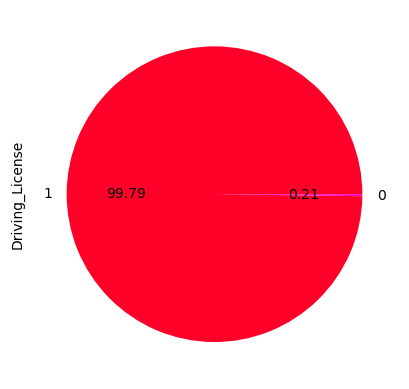

In [24]:
data["Driving_License"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

In [25]:
data.drop("Driving_License" , axis = 1 , inplace = True)

In [26]:
data

,Age,Gender,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1.570003,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,1.675938,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,1.583341,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,1.408800,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,1.481877,0,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...
381104,1.671001,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,1.489299,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,1.408800,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,1.655196,0,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


<Axes: ylabel='Previously_Insured'>

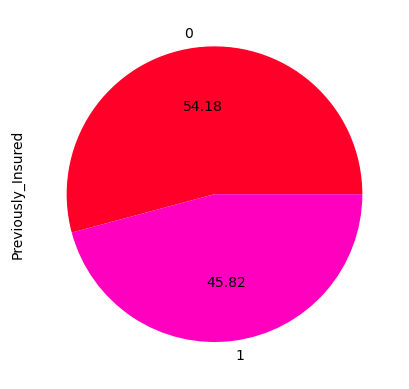

In [27]:
data["Previously_Insured"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

<Axes: ylabel='Vehicle_Age'>

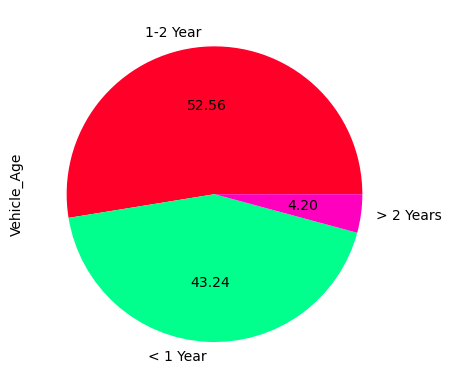

In [28]:
data["Vehicle_Age"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

<Axes: ylabel='Vehicle_Damage'>

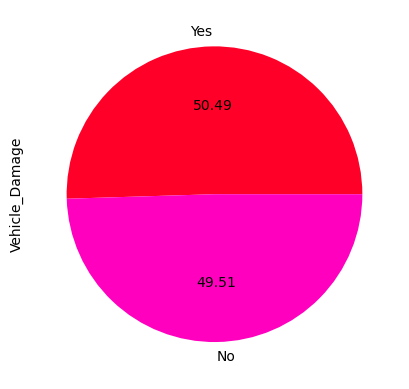

In [29]:
data["Vehicle_Damage"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

In [30]:
data["Vehicle_Damage"] = np.where(data["Vehicle_Damage"] == "Yes" , 1 , 0)

In [31]:
data

,Age,Gender,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1.570003,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,1.675938,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,1.583341,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,1.408800,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,1.481877,0,41.0,1,< 1 Year,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...
381104,1.671001,1,26.0,1,1-2 Year,0,30170.0,26.0,88,0
381105,1.489299,1,37.0,1,< 1 Year,0,40016.0,152.0,131,0
381106,1.408800,1,30.0,1,< 1 Year,0,35118.0,160.0,161,0
381107,1.655196,0,14.0,0,> 2 Years,1,44617.0,124.0,74,0


<Axes: xlabel='Annual_Premium', ylabel='Density'>

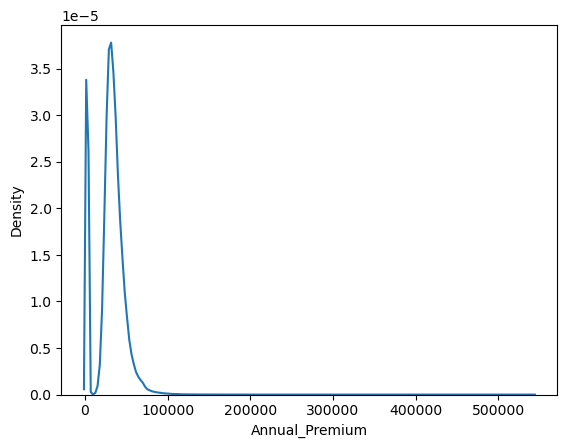

In [32]:
sns.kdeplot(data["Annual_Premium"])

<Axes: xlabel='Annual_Premium', ylabel='Density'>

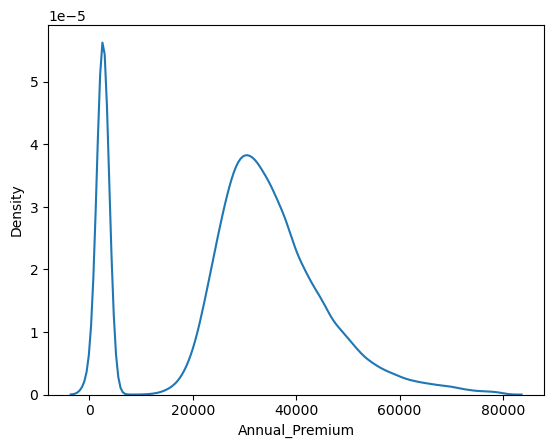

In [33]:
data["Annual_Premium"] = np.where(data["Annual_Premium"] >80000 , 0 , data["Annual_Premium"])
sns.kdeplot(data["Annual_Premium"])

<Axes: xlabel='Vintage', ylabel='Density'>

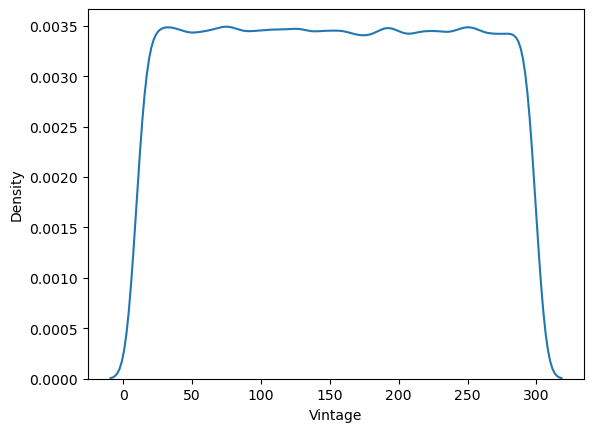

In [34]:
sns.kdeplot(data["Vintage"])

In [35]:
data

,Age,Gender,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1.570003,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,1.675938,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,1.583341,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,1.408800,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,1.481877,0,41.0,1,< 1 Year,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...
381104,1.671001,1,26.0,1,1-2 Year,0,30170.0,26.0,88,0
381105,1.489299,1,37.0,1,< 1 Year,0,40016.0,152.0,131,0
381106,1.408800,1,30.0,1,< 1 Year,0,35118.0,160.0,161,0
381107,1.655196,0,14.0,0,> 2 Years,1,44617.0,124.0,74,0


In [36]:
class OneHotEncoder:

    def __init__(self , min_frequency = None , max_categories = None , dtype = float):
        self.min_frequency = min_frequency
        self.max_categories = max_categories
        self.dtype = dtype
    def fit_transform(self , dataframe , columns):

        if type(self.min_frequency) == int:

            pass

        else : 

            self.min_frequency *= len(columns)

        if not self.min_frequency == None:

            if len(columns) == 1 :

                inf = [categories 
                    for categories in dataframe[columns[0]].value_counts().index 
                    if dataframe[columns[0]].value_counts()[categories] > self.min_frequency]

                for categories in dataframe[columns[0]].value_counts().index:

                    if not categories in inf:

                        dataframe[columns[0] + "_" + categories[0]] = np.where(dataframe[columns[0]] == categories[0] , dtype(1) , dtype(0))

                    else: 

                        dataframe[columns[0] + "_other"] = np.where(dataframe[columns[0]].isin(inf) , dtype(1) , dtype(0))

                    if drop == "first" or drop == "if_binary" :

                            dataframe.drop(str(columne[0]) + "_" + sample_data[columne[0]].value_counts.index[0] , 
                                        axis = 1 , inplace = True)

                    dataframe.drop(columne[0] , axis = 1 , inplace = True)
            else :

                for feature in columns:

                    inf = [categories 
                        for categories in dataframe[feature].value_counts().index 
                        if dataframe[feature].value_counts()[categories] > self.min_frequency]

                    for categories in dataframe[feature].value_counts().index:

                        if not categories in inf:

                            dataframe[feature + "_" + categories] = np.where(dataframe[feature] == categories , dtype(1) , dtype(0))

                        else: 

                            dataframe[feature + "_other"] = np.where(dataframe[feature].isin(inf) , dtype(1) , dtype(0))

                        if drop == "first" or drop == "if_binary" :

                            dataframe.drop(str(feature) + "_" + sample_data[feature].value_counts.index[0] , 
                                        axis = 1 , inplace = True)

                    dataframe.drop(feature , axis = 1 , inplace = True) 

        elif not self.max_categories == None:

            if len(columns) == 1:

                inf = dataframe[columnes[0]].value_counts().index[self.max_categories : ]

                for categories in dataframe[columnes[0]].value_counts().index[: self.max_categories]:

                    dataframe[columnes[0] + "_" + categories[0]] = np.where(dataframe[columnes[0]] == categories[0] , dtype(1) , dtype(0))

                dataframe[columnes[0] + "_other"] = np.where(dataframe[columnes[0]].isin(inf) , dtype(1) , dtype(0))

                if drop == "first" or drop == "if_binary" :

                            dataframe.drop(str(columne[0]) + "_" + sample_data[columne[0]].value_counts.index[0] , 
                                        axis = 1 , inplace = True)

                dataframe.drop(columnes[0] , axis = 1 , inplace = True)

            else :

                for feature in columns:

                    inf = dataframe[feature].value_counts().index[self.max_categories : ]

                    for categories in dataframe[feature].value_counts().index[: max_categories]:

                        dataframe[feature + "_" + categories] = np.where(dataframe[feature] == categories , dtype(1) , dtype(0))

                    dataframe[feature + "_other"] = np.where(dataframe[feature].isin(inf) , dtype(1) , dtype(0))

                    if drop == "first" or drop == "if_binary" :

                            dataframe.drop(str(feature) + "_" + sample_data[feature].value_counts.index[0] , 
                                        axis = 1 , inplace = True)

                    dataframe.drop(feature , axis = 1 , inplace = True)

        else :    

            if len(columns) == 1:

                for categories in dataframe[columns[0]].value_counts().index[0]:

                    dataframe[columns[0] + "_" + categories[0]] = np.where(dataframe[columns[0]] == categories[0] , dtype(1) , dtype(0))

                if drop == "first" or drop == "if_binary" :

                            dataframe.drop(str(columns[0]) + "_" + sample_data[columns[0]].value_counts.index[0] , 
                                        axis = 1 , inplace = True)

                dataframe.drop(columns[0] , axis = 1 , inplace = True)

            else : 

                for feature in columns:

                    for categories in dataframe[feature].value_counts().index[0]:

                        dataframe[feature + "_" + categories] = np.where(dataframe[feature] == categories , dtype(1) , dtype(0))

                    if drop == "first" or drop == "if_binary" :

                            dataframe.drop(str(feature) + "_" + sample_data[feature].value_counts.index[0] , 
                                        axis = 1 , inplace = True)    

                    dataframe.drop(feature , axis = 1 , inplace = True)

In [37]:
data = pd.concat([pd.get_dummies(data["Vehicle_Age"]) , 
                 data.drop("Vehicle_Age" , axis = 1)] , 
                axis = 1 , join = "inner")

In [38]:
data

,1-2 Year,< 1 Year,> 2 Years,Age,Gender,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,0,1,1.570003,1,28.0,0,1,40454.0,26.0,217,1
1,1,0,0,1.675938,1,3.0,0,0,33536.0,26.0,183,0
2,0,0,1,1.583341,1,28.0,0,1,38294.0,26.0,27,1
3,0,1,0,1.408800,1,11.0,1,0,28619.0,152.0,203,0
4,0,1,0,1.481877,0,41.0,1,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,0,0,1.671001,1,26.0,1,0,30170.0,26.0,88,0
381105,0,1,0,1.489299,1,37.0,1,0,40016.0,152.0,131,0
381106,0,1,0,1.408800,1,30.0,1,0,35118.0,160.0,161,0
381107,0,0,1,1.655196,0,14.0,0,1,44617.0,124.0,74,0


In [39]:
data["Region_Code"] = data["Region_Code"].astype("int64")

In [40]:
data

,1-2 Year,< 1 Year,> 2 Years,Age,Gender,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,0,1,1.570003,1,28,0,1,40454.0,26.0,217,1
1,1,0,0,1.675938,1,3,0,0,33536.0,26.0,183,0
2,0,0,1,1.583341,1,28,0,1,38294.0,26.0,27,1
3,0,1,0,1.408800,1,11,1,0,28619.0,152.0,203,0
4,0,1,0,1.481877,0,41,1,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,0,0,1.671001,1,26,1,0,30170.0,26.0,88,0
381105,0,1,0,1.489299,1,37,1,0,40016.0,152.0,131,0
381106,0,1,0,1.408800,1,30,1,0,35118.0,160.0,161,0
381107,0,0,1,1.655196,0,14,0,1,44617.0,124.0,74,0


In [41]:
data["Annual_Premium"] = data["Annual_Premium"].astype("int64")

In [42]:
data

,1-2 Year,< 1 Year,> 2 Years,Age,Gender,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,0,1,1.570003,1,28,0,1,40454,26.0,217,1
1,1,0,0,1.675938,1,3,0,0,33536,26.0,183,0
2,0,0,1,1.583341,1,28,0,1,38294,26.0,27,1
3,0,1,0,1.408800,1,11,1,0,28619,152.0,203,0
4,0,1,0,1.481877,0,41,1,0,27496,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,0,0,1.671001,1,26,1,0,30170,26.0,88,0
381105,0,1,0,1.489299,1,37,1,0,40016,152.0,131,0
381106,0,1,0,1.408800,1,30,1,0,35118,160.0,161,0
381107,0,0,1,1.655196,0,14,0,1,44617,124.0,74,0
